
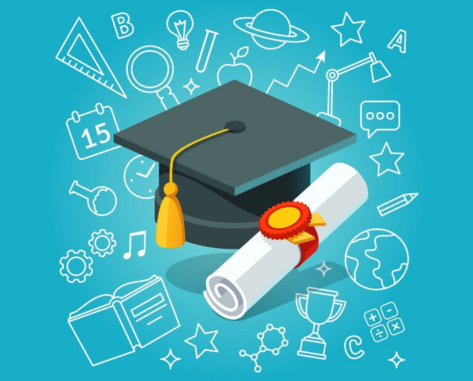
 </center>

# Giriş

<font color = 'green'>
İçerik: 
    
1. [Kütüphaneler ve veri yükleme](#1)
1. [Ön işleme](#2)
     * [Degree](#3)
     * [School name](#4)
     * [Fields of study](#5)
1. [Feature engineering](#6)
    * [Lisans](#7)
    * [Yüksek lisans](#8)
    * [Doktora](#9)
    * [Toplam bölüm sayısı](#10)
    * [Değişken birleştirme](#11)
1. [Keşifçi veri analizi (EDA)](#12)
    * [Değişken sınırlandırma ve eksik veriler](#13)
    * [Kategorik değişken analizi](#14)
    * [Sayısal değişken analizi](#15)
    * [Toplam bölüm sayısı](#16)
    * [Okul ve derece birleştirme](#17)
1. [df_education veri seti oluşturma](#18)

<a id = "1"></a><br>
# 1. Kütüphaneler ve veri yükleme

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt

%matplotlib inline
color = '#2ca25f'
cmap1 = 'Greens'
cmap2 =  'Set3'
palette1 = 'Greens'
palette2 = 'Set3'

root = '/kaggle/input/garanti-bbva-data-camp/'
target = 'moved_after_2019'
idx = 'user_id'

In [2]:
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_edu   = pd.read_csv(os.path.join(root, 'education.csv'))
df_train = pd.read_csv(os.path.join(root, 'train_users.csv'))
df_test  = pd.read_csv(os.path.join(root, 'test_users.csv'))

df = pd.concat([df_train, df_test], axis=0)

<a id = "2"></a><br>
# 2. Ön işleme

In [4]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142575 entries, 0 to 142574
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           142575 non-null  int64  
 1   school_name       142575 non-null  object 
 2   degree            106733 non-null  object 
 3   fields_of_study   122737 non-null  object 
 4   start_year_month  8202 non-null    float64
 5   end_year_month    7590 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.5+ MB


In [5]:
df_edu.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN,NaN,NaN
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği,NaN,NaN
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği,NaN,NaN


In [6]:
df_edu["user_id"].nunique()

66271

In [7]:
df_edu.drop(columns=["start_year_month","end_year_month"], inplace = True)
df_edu = df_edu[df_edu['school_name'].notnull() & df_edu['degree'].notnull()]
df_edu.head()

,user_id,school_name,degree,fields_of_study
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği
5,2,Fırat Üniversitesi,4.sinif,Bilgisayar Mühendisliği
6,2,Hafsa Sultan Mesleki ve Teknik Anadolu Lisesi,lise,Çocuk Gelişimi ve Eğitimi Alanı
7,3,Fırat Üniversitesi,Lisans Derecesi,Bilgisayar Yazılımı Mühendisliği


* start_year_mont ve end_yead_month değişkenleri çok fazla eksik veri içerdiğinden çıkarılmıştır.
* degree değişkeni boş olan kayıtlar bozuk kayıtlardır. Bu nedenle çıkarılmıştır.

<a id = "3"></a><br>
## 2.1 Degree

In [8]:
df_edu.loc[df_edu['degree'].str.contains("Associate|Ön|ön lisans|önlisans", na=False), 'degree'] = "ÖNLİSANS"
df_edu.loc[df_edu['degree'].str.contains("Doctor|Doktor|Ph", na=False), 'degree'] = "DOKTORA"
df_edu.loc[df_edu['degree'].str.contains("Yüksek|Master|MSc|MS|M.Sc.|MBA|Msc|M.Sc|M.S.|M.S", na=False), 'degree'] = "YÜKSEK_LİSANS"
df_edu.loc[df_edu['degree'].str.contains("BS|Bs|Bachelor|BSc|BE|B.E.|B.Sc.|B.S.|B.S|Engineer|BA|BBA|BEng|B.B.A.|B.A.Sc.|Undergraduate|Licentiate|Licence|License|Lisans|lisans|Bacheleer|bachelor|Bsc|Mezun|Graduate", na=False), 'degree'] = "LİSANS"
df_edu.loc[df_edu['degree'].str.contains("Öğrenci|Student", na=False), 'degree'] = "Öğrenci"

df_edu.loc[~df_edu["degree"].isin(["ÖNLİSANS","DOKTORA","YÜKSEK_LİSANS","LİSANS","Öğrenci"]), "degree"] = "Diğer"
df_edu["degree"].value_counts().head(10)

LİSANS           56289
YÜKSEK_LİSANS    21546
Diğer            20550
ÖNLİSANS          5316
DOKTORA           2572
Öğrenci            460
Name: degree, dtype: int64

* https://www.kaggle.com/code/zeynepozisil/eda-for-garanti-bbva-data-camp paylaşımı örnek alınmıştır.
* Ek olarak Mezun ve Greduate alanları Lisans mezuniyeti için eklenmiştir.
* Öğrenci sınıfı da eklenmiştir.

In [9]:
df_edu = df_edu[df_edu['degree'] != "Diğer" ]
df_edu["degree"].value_counts().head()

LİSANS           56289
YÜKSEK_LİSANS    21546
ÖNLİSANS          5316
DOKTORA           2572
Öğrenci            460
Name: degree, dtype: int64

<a id = "4"></a><br>
## 2.2 School name

In [10]:
df_edu.loc[df_edu['school_name'].str.contains("Oxford|Kaliforniya|Harvard|Stanford|Cambridge|Massachusetts|Princeton|Kaliforniya| Berkeley|Yale|Chicago|Kolombiya|Imperial|Johns Hopkins|Pensilvanya|ETH Zürih|Pekin|Tsinghua|Toronto|Londra", na=False), 'school_name'] = "TheFirstLevel(World)"
df_edu.loc[df_edu['school_name'].str.contains("Çankaya|Koç|Sabancı|ODTÜ|Bahçeşehir|Hacettepe|İstanbul Teknik|Istanbul Technical University|Bilkent|Boğaziçi|Düzce|Fırat|İstanbul Medeniyet|Özyeğin|Cankaya|Koc|Sabanci|Odtu|Bahcesehir|Istanbul Teknik|Bogazici|Düzce|Firat|Istanbul Medeniyet|Ozyegin", na=False), 'school_name'] = "TheFirstLevel(TR)"
df_edu.loc[df_edu['school_name'].str.contains("İstanbul Üniversitesi|Istanbul University|Ankara|Ege|İhsan Doğramacı|Bilkent|Gebze|Gazi|Yıldız|Yildiz Technical University|Sabancı|İzmir Yüksek Teknoloji|Atatürk|Bezm-i Alem|Erciyes|Marmara|Dokuz Eylül|Selçuk|Çukurova|Karadeniz Teknik|Eskişehir Osmangazi|Akdeniz|Abdullah Gül|Bursa Uludağ|Ondokuz Mayıs|İnönü|Anadolu", na=False), 'school_name'] = "TheSecondLevel(TR)"
df_edu.loc[df_edu['school_name'].str.contains("Süleyman Demirel|Gaziantep|Sakarya|Çankaya|Kocaeli|Van Yüzüncü|İzmir Katip Çelebi|Yıldırım Beyazıt|Başkent|Atılım|Dicle|Manisa Celâl Bayar|Pamukkale|Tobb Ekonomi Ve Teknoloji|Acıbadem Mehmet Ali Aydınlar|Mersin|Yeditepe", na=False), 'school_name'] = "TheLowLevel(TR)"

* https://www.kaggle.com/code/zeynepozisil/eda-for-garanti-bbva-data-camp paylaşımı örnek alınmıştır.

1) Dünya sıralamasında ilk 20 de yer alan üniversiteler : TheFirstLevel(World) // https://www.timeshighereducation.com/world-university-rankings/2022/world-ranking#!/page/0/length/25/sort_by/rank/sort_order/asc/cols/stats

2) Dünya sıralamasında ilk 1000 de yer alan TÜRK üniversiteler : TheFirstLevel(TR) // https://tr.euronews.com/2022/10/12/dunyanin-en-iyi-universiteleri-aciklandi-ilk-500de-turkiyeden-sadece-1-universite-var

3) TR sıralamasında ilk 30 da yer alan üniversiteler : TheSecondLevel(TR) // https://egezegen.com/egitim/turkiyenin-en-iyi-universiteleri-siralamasi/

4) TR sıralamasında ilk 50 de yer alan üniversiteler : TheLowLevel(TR) // https://egezegen.com/egitim/turkiyenin-en-iyi-universiteleri-siralamasi/

In [11]:
df_edu.loc[df_edu['school_name'].str.contains("Orta Doğu Teknik Üniversitesi|Middle East Technical University", na=False), 'school_name'] = "TheFirstLevel(TR)"
df_edu.loc[df_edu['school_name'].str.contains("Karadeniz Technical University|Dokuz Eylul University|Uludağ Üniversitesi|Uludag University|Ataturk|Istanbul Üniversitesi|İstanbul University|Eskisehir Osmangazi University", na=False), 'school_name'] = "TheSecondLevel(TR)"
df_edu.loc[~df_edu["school_name"].isin(["TheFirstLevel(World)","TheFirstLevel(TR)","TheSecondLevel(TR)","TheLowLevel(TR)"]), "school_name"] = "Diğer"

df_edu['school_name'].value_counts().head(10)

TheSecondLevel(TR)      37407
TheFirstLevel(TR)       25485
Diğer                   16479
TheLowLevel(TR)          6748
TheFirstLevel(World)       64
Name: school_name, dtype: int64

* Yukardaki listede eksik kalan alanlar eklenmiştir.

<a id = "5"></a><br>
## 2.3 Fields of study

In [12]:
df_edu.loc[df_edu['fields_of_study'].str.contains("Computer Engineer", na=False), 'fields_of_study'] = "Bilgisayar Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Electronic Engineering|Electrical and Electronic Engineering|Electrical and Electronic Engineering|Electronics Engineering|Communication Engineering|Elektrik Mühendisliği|Telecommunications Engineering|Telekomünikasyon Mühendisliği|Elektrik, Elektronik ve İletişim Mühendisliği|Elektronik Mühendisliği|Electrical Engineering|Electrical, Electronics and Communications Engineering|Elektronik ve Haberleşme Mühendisliği|Electronics and Communication Engineering|Electronics and Communications Engineering", na=False), 'fields_of_study'] = "Elektrik ve Elektronik Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Mechanical Engineering", na=False), 'fields_of_study'] = "Makine Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("İşletme ve Yönetim, Genel|Business Administration|Business Administration|Business|MBA", na=False), 'fields_of_study'] = "İşletme"
df_edu.loc[df_edu['fields_of_study'].str.contains("Industrial Engineering", na=False), 'fields_of_study'] = "Endüstri Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Mathematics", na=False), 'fields_of_study'] = "Matematik"
df_edu.loc[df_edu['fields_of_study'].str.contains("Bilgisayar Teknolojileri ve Programlama|Management Information Systems|Information Technolog|Yönetim Bilgi Sistemleri|Information Systems|Bilişim Teknolojileri|Bilişim Sistemleri|Informatics|Bilgi Teknolojisi|Management Information System|Computer Science|Computer Programming|Bilgisayar Program|Bilgisayar Teknolojisi|Matematik ve Bilgisayar Bilimleri|Computer Technology and Programming", na=False), 'fields_of_study'] = "Yönetim Bilişim Sistemleri"
df_edu.loc[df_edu['fields_of_study'].str.contains("Software Engineer|Bilgisayar Yazılımı Mühendisliği", na=False), 'fields_of_study'] = "Yazılım Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Economics|Ekonomi", na=False), 'fields_of_study'] = "İktisat"
df_edu.loc[df_edu['fields_of_study'].str.contains("Chemical Engineering", na=False), 'fields_of_study'] = "Kimya Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Mekatronik, Robotik ve Otomasyon Mühendisliği|Mechatronics Engineering|Control and Automation Engineering|Automation Engineering|Otomasyon Mühendisliği", na=False), 'fields_of_study'] = "Mekatronik Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Civil Engineering", na=False), 'fields_of_study'] = "İnşaat Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Physics|Physical Sciences", na=False), 'fields_of_study'] = "Fizik"
df_edu.loc[df_edu['fields_of_study'].str.contains("Chemistry|Kimya", na=False), 'fields_of_study'] = "Kimya"
df_edu.loc[df_edu['fields_of_study'].str.contains("Mathematical Engineering", na=False), 'fields_of_study'] = "Matematik Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Statistics", na=False), 'fields_of_study'] = "İstatistik"
df_edu.loc[df_edu['fields_of_study'].str.contains("Food Engineering", na=False), 'fields_of_study'] = "Gıda Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Engineering Management|Engineering/Industrial Management|Management", na=False), 'fields_of_study'] = "Mühendislik Yönetimi"
df_edu.loc[df_edu['fields_of_study'].str.contains("International Relations|International Relations and Affairs|Uluslararası İlişkiler", na=False), 'fields_of_study'] = "Uluslararası İlişkiler"
df_edu.loc[df_edu['fields_of_study'].str.contains("Law", na=False), 'fields_of_study'] = "Avukat"
df_edu.loc[df_edu['fields_of_study'].str.contains("Bilgisayar ve Öğretim Teknolojileri Öğretmenliği", na=False), 'fields_of_study'] = "Bilgisayar Öğretmenliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Artificial Intelligence", na=False), 'fields_of_study'] = "Yapay Zeka"
df_edu.loc[df_edu['fields_of_study'].str.contains("Metallurgical and Materials Engineering", na=False), 'fields_of_study'] = "Metalurji ve Malzeme Mühendisliği"

df_edu.loc[~df_edu["fields_of_study"].isin(["Bilgisayar Mühendisliği","Elektrik ve Elektronik Mühendisliği","Makine Mühendisliği","İşletme","Endüstri Mühendisliği","Yönetim Bilişim Sistemleri","Yazılım Mühendisliği","İktisat","Kimya Mühendisliği","Mekatronik Mühendisliği","İnşaat Mühendisliği","Fizik","Kimya","Matematik Mühendisliği","İstatistik","Gıda Mühendisliği","Mühendislik Yönetimi","Uluslararası İlişkiler","Avukat","Bilgisayar Öğretmenliği","Yapay Zeka","Metalurji ve Malzeme Mühendisliği"]), "fields_of_study"] = "Diğer"

df_edu['fields_of_study'].value_counts().head(40)

Bilgisayar Mühendisliği                22778
Diğer                                  22730
Yönetim Bilişim Sistemleri             12370
Elektrik ve Elektronik Mühendisliği    10060
İşletme                                 4038
Yazılım Mühendisliği                    2410
Makine Mühendisliği                     1877
Endüstri Mühendisliği                   1758
Mühendislik Yönetimi                    1583
Mekatronik Mühendisliği                 1278
Kimya                                   1084
İktisat                                  811
Fizik                                    766
Matematik Mühendisliği                   575
İnşaat Mühendisliği                      445
Uluslararası İlişkiler                   422
İstatistik                               338
Bilgisayar Öğretmenliği                  233
Gıda Mühendisliği                        230
Metalurji ve Malzeme Mühendisliği        158
Avukat                                   136
Yapay Zeka                               103
Name: fiel

In [13]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86183 entries, 3 to 142573
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          86183 non-null  int64 
 1   school_name      86183 non-null  object
 2   degree           86183 non-null  object
 3   fields_of_study  86183 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [14]:
df_edu = df_edu.drop_duplicates(['user_id', 'degree','fields_of_study']) 
df_edu.info()

        # Çoklama kontrolü için uygulanabilir.
        # 3.962 çoklanan değer çıkarıldı.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82221 entries, 3 to 142573
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          82221 non-null  int64 
 1   school_name      82221 non-null  object
 2   degree           82221 non-null  object
 3   fields_of_study  82221 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


<a id = "6"></a><br>
# 3. Feature engineering

<a id = "7"></a><br>
## 3.1 Lisans

* Lisans mezuniyet sayıları hesaplanmak istenmektedir.
* İkinci üniversite gibi detaylar modelde etki yaratabilir düşüncesi ile eklenmiştir.

In [15]:
df_lisans = df_edu[df_edu['degree'] == "LİSANS" ]
df_lisans = df_lisans.pivot_table(index='user_id',values='degree',aggfunc='nunique')
df_lisans.columns = ['lisanscount']
df_lisans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46974 entries, 1 to 66273
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   lisanscount  46974 non-null  int64
dtypes: int64(1)
memory usage: 734.0 KB


<a id = "8"></a><br>
## 3.2 Yüksek lisans

* Yüksek Lisans mezuniyet sayıları hesaplanmak istenmektedir.
* İkinci üniversite gibi detaylar modelde etki yaratabilir düşüncesi ile eklenmiştir.

In [16]:
df_yuksek = df_edu[df_edu['degree'] == "YÜKSEK_LİSANS" ]
df_yuksek = df_yuksek.pivot_table(index='user_id',values='degree',aggfunc='nunique')
df_yuksek.columns = ['yuksekcount']
df_yuksek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19717 entries, 1 to 66273
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   yuksekcount  19717 non-null  int64
dtypes: int64(1)
memory usage: 308.1 KB


<a id = "9"></a><br>
## 3.3 Doktora

* Yüksek Lisans mezuniyet sayıları hesaplanmak istenmektedir.
* İkinci üniversite gibi detaylar modelde etki yaratabilir düşüncesi ile eklenmiştir.

In [17]:
df_doktora = df_edu[df_edu['degree'] == "DOKTORA" ]
df_doktora = df_doktora.pivot_table(index='user_id',values='degree',aggfunc='nunique')
df_doktora.columns = ['doktoracount']
df_doktora.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2486 entries, 34 to 66271
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   doktoracount  2486 non-null   int64
dtypes: int64(1)
memory usage: 38.8 KB


<a id = "10"></a><br>
## 3.4 Toplam bölüm sayısı

* Kaç farklı bölüm ile temas ettiği analiz edilmek istenmektedir.

In [18]:
df_study = df_edu[df_edu['fields_of_study'] != "Diğer" ]
df_study = df_study.pivot_table(index='user_id',values='fields_of_study',aggfunc='nunique')
df_study.columns = ['studycount']
df_study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44090 entries, 1 to 66273
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   studycount  44090 non-null  int64
dtypes: int64(1)
memory usage: 688.9 KB


<a id = "11"></a><br>
## 3.5 Okul ve derece birleştirme

In [19]:
df_edu["Degree_School"] = df_edu['school_name'] + "_" + df_edu['degree']
df_edu.head()

,user_id,school_name,degree,fields_of_study,Degree_School
3,1,TheFirstLevel(TR),YÜKSEK_LİSANS,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS
4,1,TheFirstLevel(TR),LİSANS,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS
7,3,TheFirstLevel(TR),LİSANS,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS
8,4,TheFirstLevel(TR),LİSANS,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS
9,5,TheFirstLevel(TR),YÜKSEK_LİSANS,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS


In [20]:
df_edu.drop(columns=["school_name","degree"], inplace = True)
df_edu.head()

,user_id,fields_of_study,Degree_School
3,1,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS
4,1,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS
7,3,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS
8,4,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS
9,5,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS


<a id = "12"></a><br>
# 4. Keşifçi veri analizi (EDA)

In [21]:
df_edu = df_edu.merge(df, on="user_id", how="left")
df_edu = df_edu.merge(df_lisans, on="user_id", how="left")
df_edu = df_edu.merge(df_doktora, on="user_id", how="left")
df_edu = df_edu.merge(df_yuksek, on="user_id", how="left")

df_edu.head()

,user_id,fields_of_study,Degree_School,industry,location,moved_after_2019,lisanscount,doktoracount,yuksekcount
0,1,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS,Computer Software,"Ankara, Turkey",NaN,1.000,NaN,1.000
1,1,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS,Computer Software,"Ankara, Turkey",NaN,1.000,NaN,1.000
2,3,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS,Computer Software,"Yesilyurt, Malatya, Turkey",0.000,1.000,NaN,NaN
3,4,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS,Computer Software,Turkey,NaN,1.000,NaN,NaN
4,5,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS,Computer Software,"Kocaeli, Turkey",0.000,1.000,NaN,1.000


In [22]:
df_edu.drop(columns=["industry","location"], inplace = True)
df_edu.head()

,user_id,fields_of_study,Degree_School,moved_after_2019,lisanscount,doktoracount,yuksekcount
0,1,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS,NaN,1.000,NaN,1.000
1,1,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS,NaN,1.000,NaN,1.000
2,3,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS,0.000,1.000,NaN,NaN
3,4,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS,NaN,1.000,NaN,NaN
4,5,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS,0.000,1.000,NaN,1.000


In [23]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82221 entries, 0 to 82220
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           82221 non-null  int64  
 1   fields_of_study   82221 non-null  object 
 2   Degree_School     82221 non-null  object 
 3   moved_after_2019  65726 non-null  float64
 4   lisanscount       76262 non-null  float64
 5   doktoracount      7228 non-null   float64
 6   yuksekcount       42269 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


<a id = "13"></a><br>
## 4.1 Değişken sınırlandırma ve eksik veriler

In [24]:
cat_cols = [col for col in df_edu.columns if df_edu[col].dtype == 'object']
num_cols = ['lisanscount', 'doktoracount', 'yuksekcount']

In [25]:
df_edu['lisanscount'].fillna(0, inplace=True)
df_edu['doktoracount'].fillna(0, inplace=True)
df_edu['yuksekcount'].fillna(0, inplace=True)

df_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82221 entries, 0 to 82220
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           82221 non-null  int64  
 1   fields_of_study   82221 non-null  object 
 2   Degree_School     82221 non-null  object 
 3   moved_after_2019  65726 non-null  float64
 4   lisanscount       82221 non-null  float64
 5   doktoracount      82221 non-null  float64
 6   yuksekcount       82221 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


<a id = "14"></a><br>
## 4.2 Kategorik değişken analizi

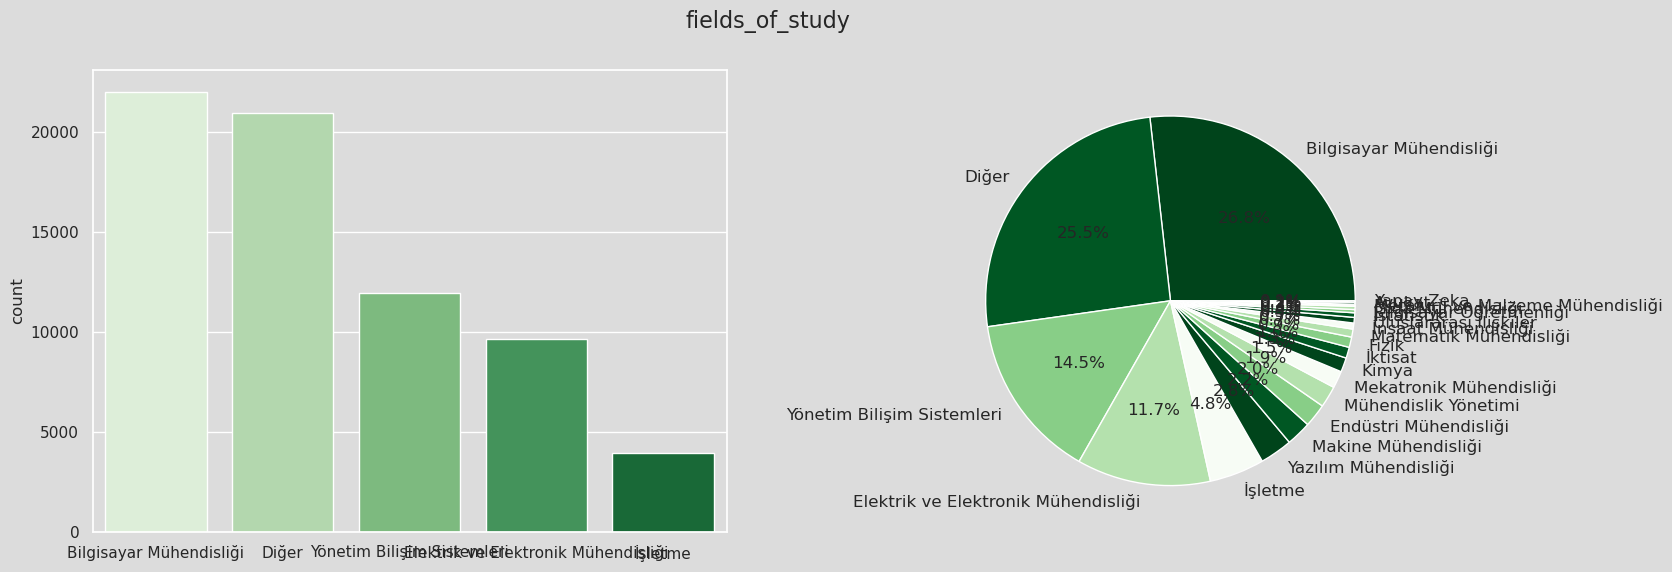

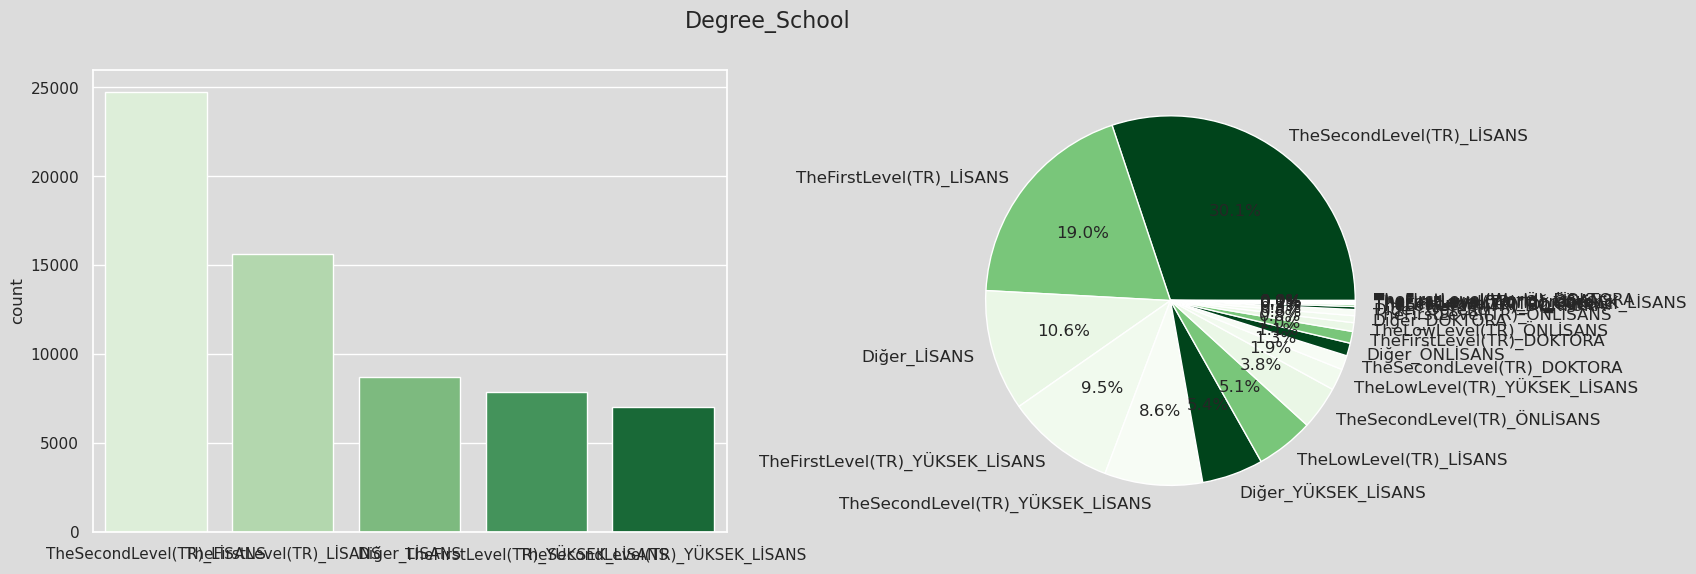

In [26]:
def cat_analyser(data, col, freq_limit = 5):
    df_ = data.copy()
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  x = col,
                  ax = ax[0],
                  palette= palette1,
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap(cmap1)
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 12},
                                      ax = ax[1],
                                      colors = pie_cmap(normalize(df_[col].value_counts())))
    ax[1].set_ylabel('')
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()


for col in cat_cols:
    cat_analyser(df_edu, col)

In [27]:
# Kategorik değişkenlerin hedef değişken ile analizi;
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    
for col in cat_cols:
    target_summary_with_cat(df_edu,"moved_after_2019",col)

                                     TARGET_MEAN
fields_of_study                                 
Avukat                                     0.252
Bilgisayar Mühendisliği                    0.433
Bilgisayar Öğretmenliği                    0.335
Diğer                                      0.389
Elektrik ve Elektronik Mühendisliği        0.420
Endüstri Mühendisliği                      0.461
Fizik                                      0.334
Gıda Mühendisliği                          0.383
Kimya                                      0.342
Makine Mühendisliği                        0.438
Matematik Mühendisliği                     0.430
Mekatronik Mühendisliği                    0.511
Metalurji ve Malzeme Mühendisliği          0.411
Mühendislik Yönetimi                       0.368
Uluslararası İlişkiler                     0.406
Yapay Zeka                                 0.500
Yazılım Mühendisliği                       0.468
Yönetim Bilişim Sistemleri                 0.412
İktisat             

<a id = "15"></a><br>
## 4.3 Sayısal değişken analizi

count   82221.000
mean        0.928
std         0.259
min         0.000
5%          0.000
10%         1.000
20%         1.000
30%         1.000
40%         1.000
50%         1.000
60%         1.000
70%         1.000
80%         1.000
90%         1.000
95%         1.000
99%         1.000
max         1.000
Name: lisanscount, dtype: float64


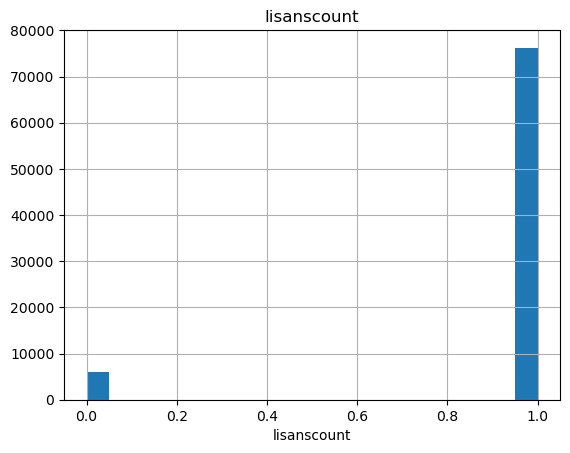

count   82221.000
mean        0.088
std         0.283
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         1.000
99%         1.000
max         1.000
Name: doktoracount, dtype: float64


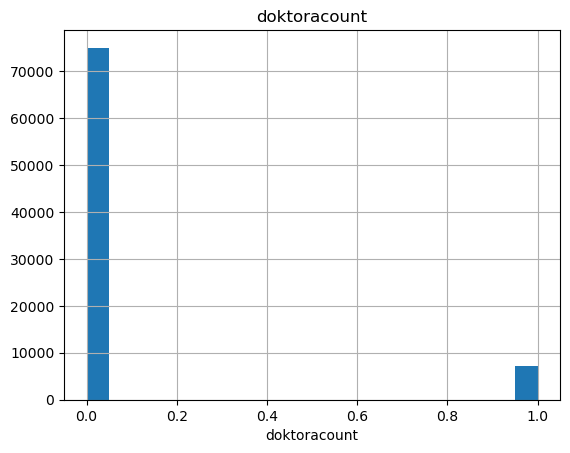

count   82221.000
mean        0.514
std         0.500
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         1.000
60%         1.000
70%         1.000
80%         1.000
90%         1.000
95%         1.000
99%         1.000
max         1.000
Name: yuksekcount, dtype: float64


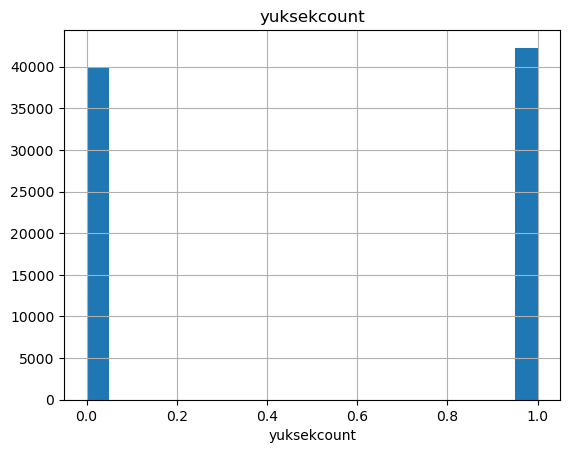

In [28]:
# Numerik değişken analizi
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()    

for col in num_cols:
    num_summary(df_edu, col, True)

In [29]:
# Numerik değişkenlerin hedef değişken ile analizi;
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n\n")
    
for col in num_cols:
    target_summary_with_num(df_edu, "moved_after_2019", col)

                  lisanscount
moved_after_2019             
0.000                   0.918
1.000                   0.939


                  doktoracount
moved_after_2019              
0.000                    0.101
1.000                    0.071


                  yuksekcount
moved_after_2019             
0.000                   0.534
1.000                   0.487




In [30]:
df_edu.drop(columns=["moved_after_2019","lisanscount","doktoracount","yuksekcount"], inplace = True)
df_edu.head()

,user_id,fields_of_study,Degree_School
0,1,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS
1,1,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS
2,3,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS
3,4,Yazılım Mühendisliği,TheFirstLevel(TR)_LİSANS
4,5,Yazılım Mühendisliği,TheFirstLevel(TR)_YÜKSEK_LİSANS


<a id = "16"></a><br>
## 4.4 Toplam bölüm sayısı

In [31]:
df_edu1 = df_edu.drop_duplicates(['fields_of_study', 'Degree_School'])
df_edu1 = df_edu1.pivot_table(index='user_id', columns='Degree_School', values='Degree_School',aggfunc='count')
df_edu1.head()

Degree_School,Diğer_DOKTORA,Diğer_LİSANS,Diğer_YÜKSEK_LİSANS,Diğer_ÖNLİSANS,Diğer_Öğrenci,TheFirstLevel(TR)_DOKTORA,TheFirstLevel(TR)_LİSANS,TheFirstLevel(TR)_YÜKSEK_LİSANS,TheFirstLevel(TR)_ÖNLİSANS,TheFirstLevel(TR)_Öğrenci,TheFirstLevel(World)_DOKTORA,TheFirstLevel(World)_LİSANS,TheFirstLevel(World)_YÜKSEK_LİSANS,TheFirstLevel(World)_Öğrenci,TheLowLevel(TR)_DOKTORA,TheLowLevel(TR)_LİSANS,TheLowLevel(TR)_YÜKSEK_LİSANS,TheLowLevel(TR)_ÖNLİSANS,TheLowLevel(TR)_Öğrenci,TheSecondLevel(TR)_DOKTORA,TheSecondLevel(TR)_LİSANS,TheSecondLevel(TR)_YÜKSEK_LİSANS,TheSecondLevel(TR)_ÖNLİSANS,TheSecondLevel(TR)_Öğrenci
user_id,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN
11,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id = "17"></a><br>
## 4.5 Okul ve derece birleştirme

In [32]:
df_edu2 = df_edu.drop_duplicates(['user_id', 'fields_of_study'])
df_edu2 = df_edu2.pivot_table(index='user_id', columns='fields_of_study', values='fields_of_study',aggfunc='count')
df_edu2.head()

fields_of_study,Avukat,Bilgisayar Mühendisliği,Bilgisayar Öğretmenliği,Diğer,Elektrik ve Elektronik Mühendisliği,Endüstri Mühendisliği,Fizik,Gıda Mühendisliği,Kimya,Makine Mühendisliği,Matematik Mühendisliği,Mekatronik Mühendisliği,Metalurji ve Malzeme Mühendisliği,Mühendislik Yönetimi,Uluslararası İlişkiler,Yapay Zeka,Yazılım Mühendisliği,Yönetim Bilişim Sistemleri,İktisat,İnşaat Mühendisliği,İstatistik,İşletme
user_id,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id = "18"></a><br>
# 5. df_education veri seti oluşturma

In [33]:
df_education = df_edu1.merge(df_edu2, on="user_id", how="left")
df_education = df_education.merge(df_lisans, on="user_id", how="left")
df_education = df_education.merge(df_yuksek, on="user_id", how="left") 
df_education = df_education.merge(df_doktora, on="user_id", how="left") 
df_education = df_education.merge(df_study, on="user_id", how="left")
df_education.head()

,Diğer_DOKTORA,Diğer_LİSANS,Diğer_YÜKSEK_LİSANS,Diğer_ÖNLİSANS,Diğer_Öğrenci,TheFirstLevel(TR)_DOKTORA,TheFirstLevel(TR)_LİSANS,TheFirstLevel(TR)_YÜKSEK_LİSANS,TheFirstLevel(TR)_ÖNLİSANS,TheFirstLevel(TR)_Öğrenci,TheFirstLevel(World)_DOKTORA,TheFirstLevel(World)_LİSANS,TheFirstLevel(World)_YÜKSEK_LİSANS,TheFirstLevel(World)_Öğrenci,TheLowLevel(TR)_DOKTORA,TheLowLevel(TR)_LİSANS,TheLowLevel(TR)_YÜKSEK_LİSANS,TheLowLevel(TR)_ÖNLİSANS,TheLowLevel(TR)_Öğrenci,TheSecondLevel(TR)_DOKTORA,TheSecondLevel(TR)_LİSANS,TheSecondLevel(TR)_YÜKSEK_LİSANS,TheSecondLevel(TR)_ÖNLİSANS,TheSecondLevel(TR)_Öğrenci,Avukat,Bilgisayar Mühendisliği,Bilgisayar Öğretmenliği,Diğer,Elektrik ve Elektronik Mühendisliği,Endüstri Mühendisliği,Fizik,Gıda Mühendisliği,Kimya,Makine Mühendisliği,Matematik Mühendisliği,Mekatronik Mühendisliği,Metalurji ve Malzeme Mühendisliği,Mühendislik Yönetimi,Uluslararası İlişkiler,Yapay Zeka,Yazılım Mühendisliği,Yönetim Bilişim Sistemleri,İktisat,İnşaat Mühendisliği,İstatistik,İşletme,lisanscount,yuksekcount,doktoracount,studycount
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,1.000
5,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,1.000
6,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,1.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,1.000
11,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,NaN,NaN,NaN,1.000,NaN,NaN,2.000


In [34]:
import re
            # https://docs.python.org/3/library/re.html sayfasından detaylı bilgi alınabilir.

df_education.columns = [x.replace(" ", "_") for x in df_education.columns]
df_education = df_education.fillna(0).astype(int)
df_education.head()

,Diğer_DOKTORA,Diğer_LİSANS,Diğer_YÜKSEK_LİSANS,Diğer_ÖNLİSANS,Diğer_Öğrenci,TheFirstLevel(TR)_DOKTORA,TheFirstLevel(TR)_LİSANS,TheFirstLevel(TR)_YÜKSEK_LİSANS,TheFirstLevel(TR)_ÖNLİSANS,TheFirstLevel(TR)_Öğrenci,TheFirstLevel(World)_DOKTORA,TheFirstLevel(World)_LİSANS,TheFirstLevel(World)_YÜKSEK_LİSANS,TheFirstLevel(World)_Öğrenci,TheLowLevel(TR)_DOKTORA,TheLowLevel(TR)_LİSANS,TheLowLevel(TR)_YÜKSEK_LİSANS,TheLowLevel(TR)_ÖNLİSANS,TheLowLevel(TR)_Öğrenci,TheSecondLevel(TR)_DOKTORA,TheSecondLevel(TR)_LİSANS,TheSecondLevel(TR)_YÜKSEK_LİSANS,TheSecondLevel(TR)_ÖNLİSANS,TheSecondLevel(TR)_Öğrenci,Avukat,Bilgisayar_Mühendisliği,Bilgisayar_Öğretmenliği,Diğer,Elektrik_ve_Elektronik_Mühendisliği,Endüstri_Mühendisliği,Fizik,Gıda_Mühendisliği,Kimya,Makine_Mühendisliği,Matematik_Mühendisliği,Mekatronik_Mühendisliği,Metalurji_ve_Malzeme_Mühendisliği,Mühendislik_Yönetimi,Uluslararası_İlişkiler,Yapay_Zeka,Yazılım_Mühendisliği,Yönetim_Bilişim_Sistemleri,İktisat,İnşaat_Mühendisliği,İstatistik,İşletme,lisanscount,yuksekcount,doktoracount,studycount
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,2


* Yararlanılan kaynaklar;

            * https://www.kaggle.com/code/zeynepozisil/eda-for-garanti-bbva-data-camp
            * https://www.kaggle.com/code/greysky/randomforest-baseline
            * https://docs.python.org/3/library/re.html
            
* Diğer veri seti incelemeleri için;
            
            * Language : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-language
            * Skills : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-skills
            * Experience : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-experience